In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:


weather_dataset = pd.read_csv('weather_prediction_dataset.csv')
weather_labels = pd.read_csv('weather_prediction_bbq_labels.csv')




In [7]:
# 1. Convert the 'DATE' column to datetime format
weather_dataset['DATE'] = pd.to_datetime(weather_dataset['DATE'], format='%Y%m%d')

In [8]:


# 2. Handle missing or inconsistent data
# Use SimpleImputer to fill missing values with mean for numerical data, mode for categorical
numerical_features = weather_dataset.select_dtypes(include=['float64', 'int64']).columns
categorical_features = weather_dataset.select_dtypes(include=['object']).columns

# Create a preprocessing pipeline
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),   # Impute missing values with mean
    ('scaler', StandardScaler())                   # Standardize numerical features
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with most frequent
    ('onehot', OneHotEncoder(handle_unknown='ignore'))     # OneHotEncoding for categorical data
])

# Combine both transformers into one
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# 3. Split data into features (X) and labels (y)
X = weather_dataset
y = weather_labels

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Apply the preprocessing pipeline to training data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Now, X_train_preprocessed and X_test_preprocessed are ready for model training!

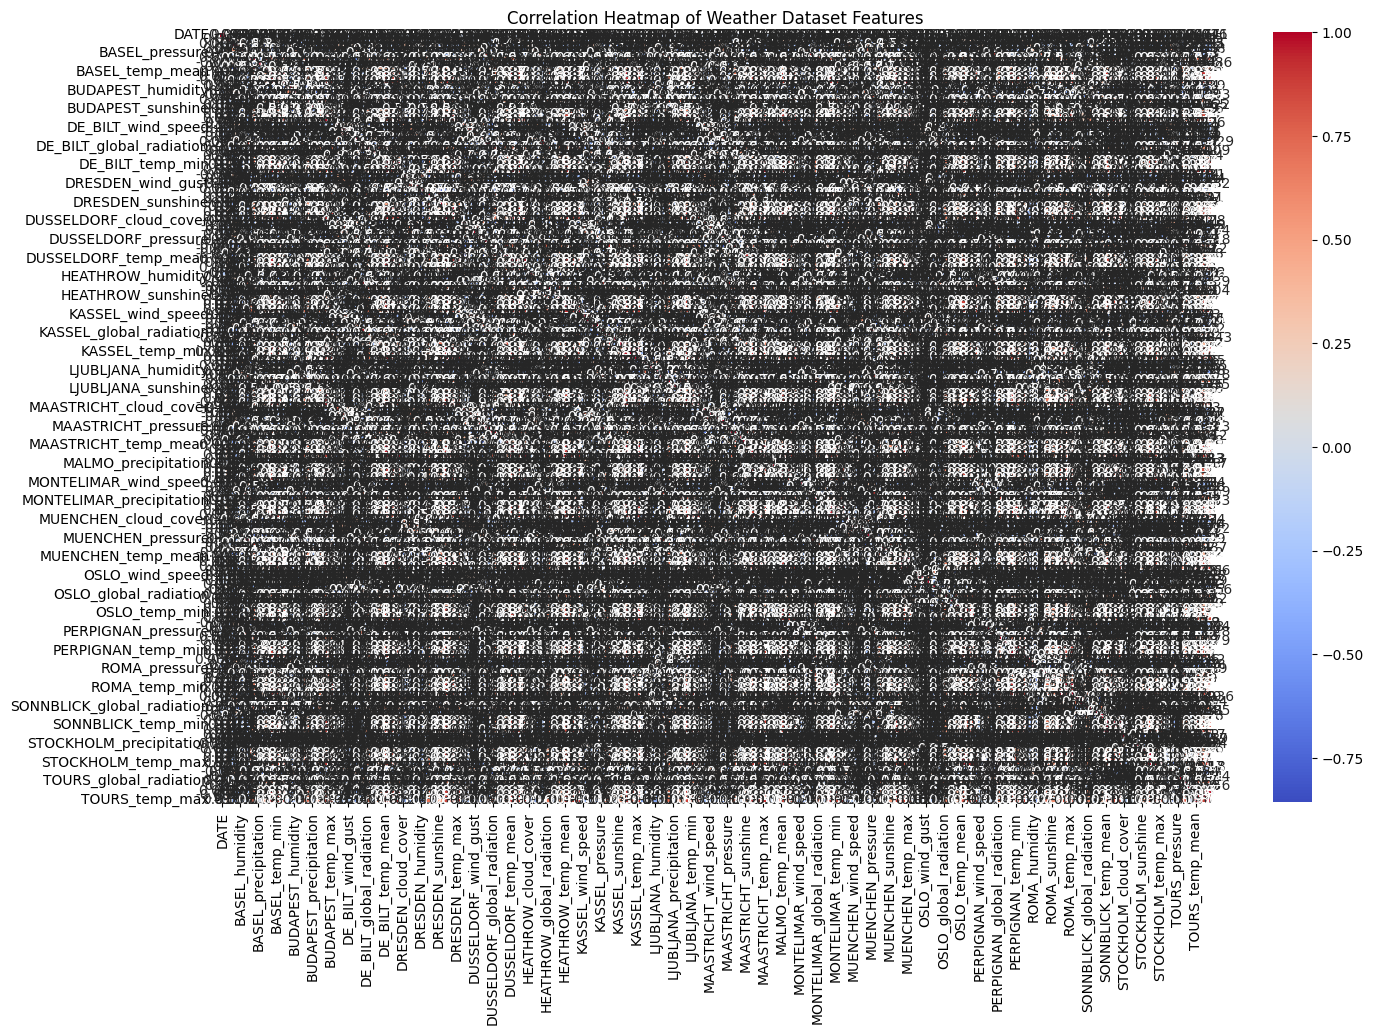

In [9]:
plt.figure(figsize=(16, 10))
correlation_matrix = weather_dataset.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Weather Dataset Features')
plt.show()

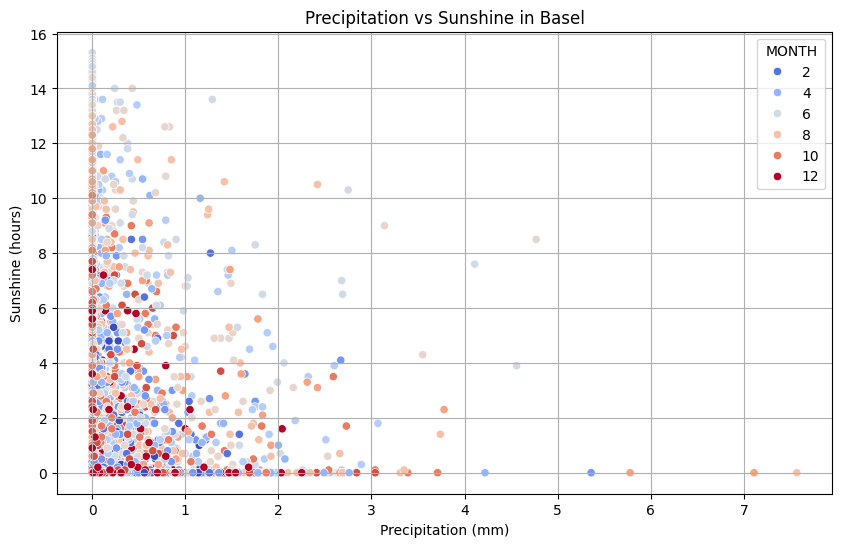

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=weather_dataset['BASEL_precipitation'], y=weather_dataset['BASEL_sunshine'], hue=weather_dataset['MONTH'], palette='coolwarm')
plt.title('Precipitation vs Sunshine in Basel')
plt.xlabel('Precipitation (mm)')
plt.ylabel('Sunshine (hours)')
plt.grid(True)
plt.show()

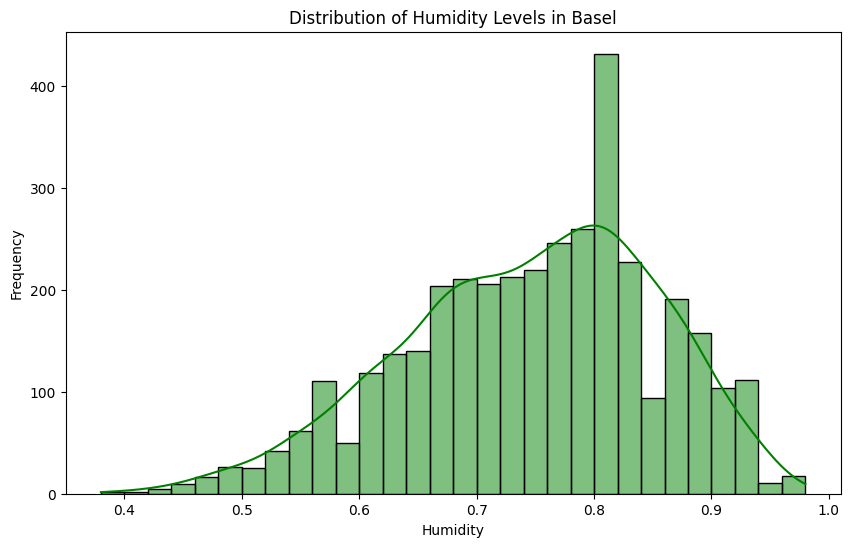

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(weather_dataset['BASEL_humidity'], bins=30, kde=True, color='green')
plt.title('Distribution of Humidity Levels in Basel')
plt.xlabel('Humidity')
plt.ylabel('Frequency')
plt.show()

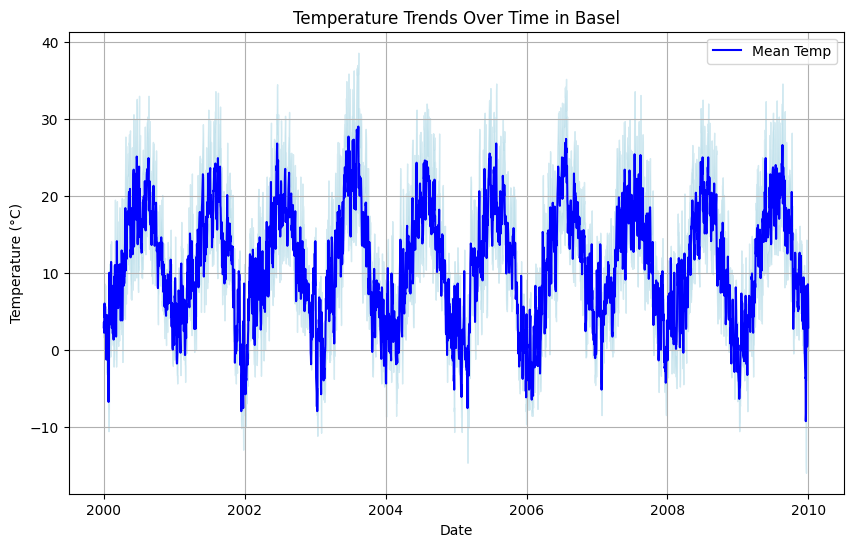

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(weather_dataset['DATE'], weather_dataset['BASEL_temp_mean'], label='Mean Temp', color='blue')
plt.fill_between(weather_dataset['DATE'], weather_dataset['BASEL_temp_min'], weather_dataset['BASEL_temp_max'], color='lightblue', alpha=0.5)
plt.title('Temperature Trends Over Time in Basel')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()

In [16]:
X = weather_dataset.drop(columns=['DATE'])  # Exclude non-relevant features like 'DATE'
y = weather_labels['BASEL_BBQ_weather']     # Use the appropriate target label

# Perform the train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# logistic_regression.py
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Logistic Regression model pipeline
logistic_model = Pipeline(steps=[
    ('scaler', StandardScaler()),  # Scale the features
    ('classifier', LogisticRegression())
])

# Fit the model to the training data
logistic_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = logistic_model.predict(X_test)

# Print results
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")


Accuracy: 0.9370725034199726
Confusion Matrix:
[[517  25]
 [ 21 168]]
Classification Report:
              precision    recall  f1-score   support

       False       0.96      0.95      0.96       542
        True       0.87      0.89      0.88       189

    accuracy                           0.94       731
   macro avg       0.92      0.92      0.92       731
weighted avg       0.94      0.94      0.94       731



In [19]:
# random_forest.py
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Random Forest model pipeline
rf_model = Pipeline(steps=[
    ('scaler', StandardScaler()),  # Scale the features
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = rf_model.predict(X_test)

# Print results
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")


Accuracy: 0.9890560875512996
Confusion Matrix:
[[541   1]
 [  7 182]]
Classification Report:
              precision    recall  f1-score   support

       False       0.99      1.00      0.99       542
        True       0.99      0.96      0.98       189

    accuracy                           0.99       731
   macro avg       0.99      0.98      0.99       731
weighted avg       0.99      0.99      0.99       731



In [20]:
# gradient_boosting.py
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Gradient Boosting model pipeline
gb_model = Pipeline(steps=[
    ('scaler', StandardScaler()),  # Scale the features
    ('classifier', GradientBoostingClassifier(random_state=42))
])

# Fit the model to the training data
gb_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = gb_model.predict(X_test)

# Print results
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Accuracy: 1.0
Confusion Matrix:
[[542   0]
 [  0 189]]
Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       542
        True       1.00      1.00      1.00       189

    accuracy                           1.00       731
   macro avg       1.00      1.00      1.00       731
weighted avg       1.00      1.00      1.00       731



In [21]:
# svm_model.py
import pandas as pd
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# SVM model pipeline
svm_model = Pipeline(steps=[
    ('scaler', StandardScaler()),  # Scale the features
    ('classifier', SVC(kernel='rbf'))
])

# Fit the model to the training data
svm_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = svm_model.predict(X_test)

# Print results
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Accuracy: 0.9261285909712722
Confusion Matrix:
[[511  31]
 [ 23 166]]
Classification Report:
              precision    recall  f1-score   support

       False       0.96      0.94      0.95       542
        True       0.84      0.88      0.86       189

    accuracy                           0.93       731
   macro avg       0.90      0.91      0.90       731
weighted avg       0.93      0.93      0.93       731

